<img src="../images/cads-logo.png" style="height: 100px;" align=left> 
<img src="../images/sklearn-logo.png" style="height: 100px;" align=right>

# Linear Regression

In this notebook you will learn what a linear regression is and for what it can be used.

We will start with a simple linear regression, which uses one predictive variable to predict the outcome, e.g. predicting a person's weight based only on his/her height. You will learn how to: 
- fit a linear regression to data
- predict output values for new data
- measure the performance of the model

Then we will move on to a multidimensional linear regression, which uses multiple predictive variables to predict an outcome, e.g. predicting a person's weight based on both their height and their age.

Finally, we will discuss polynomial regression. For this, we will transform features into a higher dimensional space so that we can use a linear regression to capture non-linear relationships.

# Table of Contents
- [Linear Regression](#Linear-Regression)
- [Introduction to Linear Regression](#Introduction-to-Linear-Regression)
    - [Motivation](#Motivation)
- [Simple Linear Regression](#Simple-Linear-Regression)
    - [Learning Model Coefficients](#Learning-Model-Coefficients)
    - [How well does the model fit the data?](#How-well-does-the-model-fit-the-data?)
    - [Exercise - Create your first Linear Regression model](#Exercise---Create-your-first-Linear-Regression-model)
    - [Bonus Exercise - Implement your own error metrics](#Bonus-Exercise---Implement-your-own-error-metrics)
- [Multidimensional linear regression](#Multidimensional-linear-regression)
    - [Exercise - Effects of Advertising on Sales](#Exercise---Effects-of-Advertising-on-Sales)
- [Feature Scaling](#Feature-Scaling)
- [Handling Categorical Predictors with Two Categories](#Handling-Categorical-Predictors-with-Two-Categories)
- [Handling Categorical Predictors with More than Two Categories](#Handling-Categorical-Predictors-with-More-than-Two-Categories)
- [Using Linear Regression for non-linear relations](#Using-Linear-Regression-for-non-linear-relations)
    - [Basis functions](#Basis-functions)
    - [Regression with polynomial basis functions](#Regression-with-polynomial-basis-functions)
    - [A comment on `PolynomialFeatures`](#A-comment-on-PolynomialFeatures)
- [Best Practice for Machine Learning](#Best-Practice-for-Machine-Learning)
    - [Exercise - Train and test the advertising dataset](#Exercise---Train-and-test-the-advertising-dataset)
- [Explore sklearns datasets](#Explore-sklearns-datasets)
- [Lasso, Ridge, and Elastic Net Regression: Regularization](#Lasso,-Ridge,-and-Elastic-Net-Regression:-Regularization)
- [Summary](#Summary)
- [Resources](#Resources)

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn.linear_model
import sklearn.metrics
import sklearn.preprocessing
import sklearn.pipeline
import sklearn.datasets

sns.set()
# seaborn library for our visualization
# too many library will slow down the system

Jamboard link: https://jamboard.google.com/d/1KAudlFnKiSqJigC4wwO6t6EqBslIABNyqrkgBEnTIJk/viewer?f=0

## Introduction to Linear Regression
<img src ="../images/linear_regression.png">

### Motivation
Why linear regression?
- Easy to use (requires very little tuning)
- Low cost of computation
- Easy to interpret
- Basis for many other methods

## Simple Linear Regression

A simple linear regression predicts a **continuous response** using a **single, continuous feature** (also called "predictor" or "input variable"). It takes the following form:

$y = \beta_0 + \beta_1x$

What does each term represent?
- $y$ is the response
- $x$ is the feature
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for x, also called slope

<img src="../images/slope_intercept.png">

Together, $\beta_0$ and $\beta_1$ are called the **model coefficients**. Fitting a model to data means to "learn" the optimal values for these coefficients.

### Learning Model Coefficients

Generally speaking, coefficients are estimated using the **least squares criterion**, which means we find the line that minimizes the cumulative distance from the data. The most common metric for this distance is the **residual sum of squares (RSS)**, also known as the **sum of squared residuals (SSR)** or the **sum of squared errors (SSE)**, is the sum of the squares of residuals (deviations predicted from actual empirical value:

<img src="../images/estimating_coefficients.png">

What elements are present in the diagram?
- The black dots are the **observed values** of x and y.
- The blue line is the line that minimizes the sum of squared residuals, i.e. the **least squares line**.
- The red lines are the **residuals**, which are the distances between the observed values and the least squares line.

How do the model coefficients relate to the least squares line?
- $\beta_0$ is the **intercept** (the value of $y$ when $x$=0)
- $\beta_1$ is the **slope**, or angle, of the line (the change in $y$ divided by change in $x$)

Here is a graphical depiction of those calculations:

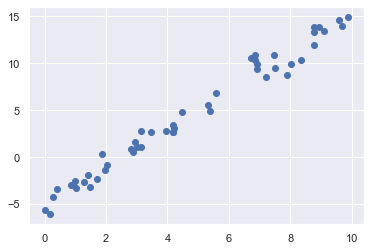

In [4]:
# Create random data
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = -5 + 2 * x + rng.randn(50)
plt.scatter(x, y);

We can use Scikit-Learn's ``LinearRegression`` estimator to fit this data and construct the best-fit line:

**Step 1 - Choose model hyperparameters**

Hyperparameters are model parameters that we select before fitting it to the data. These change the behaviour of our model. For a linear regression, the only hyperparameter we're interested in is whether or not to fit the intercept to our data. If we set this to `False`, then Python expects the data to be centered and simply sets $\beta_0 = 0$.

In [5]:
# 1. import the library
# 2. instantiate the model - assign the model to a variable
# 3. Fit the model
# 4. Predict

from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

**Step 2 - Arrange data into a features matrix and target vector**

Scikit learn is an extremely flexible framework for machine learning. This flexibility comes at the cost of very strict requirements for features and target values.

- Features must be a 2D-array with the shape (number of samples, number of features), i.e. each row of X represents a data entry and each column represents a feature
- Target values must be a 1D-array with the shape (number of samples, )

In case we only have one feature, like here, we need to first transform the variable.

<img src="../images/numpy_array.png">

In [6]:
print("Shape of x: {}".format(x.shape))
print(x)

Shape of x: (50,)
[4.17022005e+00 7.20324493e+00 1.14374817e-03 3.02332573e+00
 1.46755891e+00 9.23385948e-01 1.86260211e+00 3.45560727e+00
 3.96767474e+00 5.38816734e+00 4.19194514e+00 6.85219500e+00
 2.04452250e+00 8.78117436e+00 2.73875932e-01 6.70467510e+00
 4.17304802e+00 5.58689828e+00 1.40386939e+00 1.98101489e+00
 8.00744569e+00 9.68261576e+00 3.13424178e+00 6.92322616e+00
 8.76389152e+00 8.94606664e+00 8.50442114e-01 3.90547832e-01
 1.69830420e+00 8.78142503e+00 9.83468338e-01 4.21107625e+00
 9.57889530e+00 5.33165285e+00 6.91877114e+00 3.15515631e+00
 6.86500928e+00 8.34625672e+00 1.82882773e-01 7.50144315e+00
 9.88861089e+00 7.48165654e+00 2.80443992e+00 7.89279328e+00
 1.03226007e+00 4.47893526e+00 9.08595503e+00 2.93614148e+00
 2.87775339e+00 1.30028572e+00]


In [7]:
print("Shape of y: {}".format(y.shape))
print(y)

Shape of y: (50,)
[ 2.65326739  8.56128423 -5.66895863  1.03398685 -3.18219253 -2.91881241
  0.3850064   2.6532587   2.74351393  4.88870572  2.63673199 10.39684461
 -0.86014725 11.92535308 -4.26133265 10.50960534  3.466255    6.79099968
 -1.89209091 -1.39022006  9.87237318 14.01588879  1.05958933  9.4330755
 13.36676646 13.82323535 -3.01352845 -3.33376317 -2.35778955 13.81571822
 -2.5201335   3.12405966 14.64630875  5.58773399  9.96917167  2.83012944
 10.91559396 10.2960171  -6.07834826  9.49842044 14.93725885 10.83948201
  0.92451479  8.76338535 -3.24168388  4.78584517 13.4020048   1.63429415
  0.53317863 -2.60018663]


In [8]:
# chg the dimension

x = x[:,np.newaxis]
print("Shape of x: {}".format(x.shape))
print(x)

Shape of x: (50, 1)
[[4.17022005e+00]
 [7.20324493e+00]
 [1.14374817e-03]
 [3.02332573e+00]
 [1.46755891e+00]
 [9.23385948e-01]
 [1.86260211e+00]
 [3.45560727e+00]
 [3.96767474e+00]
 [5.38816734e+00]
 [4.19194514e+00]
 [6.85219500e+00]
 [2.04452250e+00]
 [8.78117436e+00]
 [2.73875932e-01]
 [6.70467510e+00]
 [4.17304802e+00]
 [5.58689828e+00]
 [1.40386939e+00]
 [1.98101489e+00]
 [8.00744569e+00]
 [9.68261576e+00]
 [3.13424178e+00]
 [6.92322616e+00]
 [8.76389152e+00]
 [8.94606664e+00]
 [8.50442114e-01]
 [3.90547832e-01]
 [1.69830420e+00]
 [8.78142503e+00]
 [9.83468338e-01]
 [4.21107625e+00]
 [9.57889530e+00]
 [5.33165285e+00]
 [6.91877114e+00]
 [3.15515631e+00]
 [6.86500928e+00]
 [8.34625672e+00]
 [1.82882773e-01]
 [7.50144315e+00]
 [9.88861089e+00]
 [7.48165654e+00]
 [2.80443992e+00]
 [7.89279328e+00]
 [1.03226007e+00]
 [4.47893526e+00]
 [9.08595503e+00]
 [2.93614148e+00]
 [2.87775339e+00]
 [1.30028572e+00]]


**Step 3 - Fit the model to your data**

In [9]:
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

We can inspect the parameters $\beta_0, \beta_1$ of the model:

In [10]:
# regression: can only find 2 things: 
# 1. intercept 
# 2. slope


# intercept, i.e. beta_0
model.intercept_

-4.9985770855532055

In [11]:
# slope, i.e. beta_1
model.coef_

array([2.02720881])

**Step 4 - Visually inspect the fit**

We can apply the model to our input features and visually inspect the fit.

In [12]:
yfit = model.predict(x)

In [13]:
print("Shape of yfit: {}".format(yfit.shape))
print(yfit)

Shape of yfit: (50,)
[ 3.45532973  9.60390451 -4.99625847  1.13033546 -2.02352874 -3.12668096
 -1.22269367  2.00666042  3.04472811  5.92436322  3.49937104  8.892253
 -0.85390307 12.80269695 -4.44337338  8.59319935  3.46106263  6.32723234
 -2.1526407  -0.98264625 11.23418736 14.63010688  1.35518547  9.03624798
 12.76766102 13.13696802 -3.27455334 -4.20685508 -1.55575986 12.80320511
 -3.00488141  3.53815379 14.41984386  5.80979655  9.02721673  1.39758358
  8.9182302  11.92102807 -4.62783552 10.20841456 15.04770203 10.16830298
  0.68660823 11.001763   -2.90597039  4.08115994 13.420551    0.9535948
  0.83522993 -2.36262642]


The model applies the learned coefficients $\beta_0, \beta_1$ to each row of our feature matrix (a "row" here is simply a single value) and computes the output. We could do this manually as well to confirm that scikit-learn is doing what we expect it to, e.g.

In [14]:
# the y fit for index 0
model.intercept_ + model.coef_ * x[0]

array([3.45532973])

Let's plot the raw data and the predicted values using matplotlib

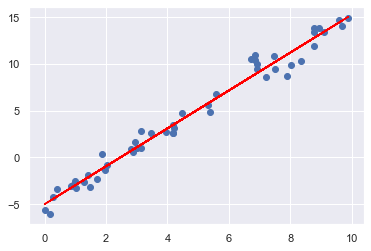

In [15]:
plt.scatter(x, y);
plt.plot(x, yfit, color='red');

The slope and intercept of the data are contained in the model's fit parameters, which in Scikit-Learn are always marked by a trailing underscore. Here the relevant parameters are ``coef_`` and ``intercept_``:

In [16]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [2.02720881]
Model intercept: -4.9985770855532055


We see that the results are very close to the inputs, as we might hope. Can we measure how close, though?

### How well does the model fit the data?
The quality of a linear regression fit is most commonly described with the **mean squared error (MSE)**, which computes the average of the squared differences between observed and predicted target values:

$$MSE = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$$

where:
- $y_i$ represents the observed target value for $x_i$
- $\hat y_i$ represents the predicted target value for $x_i$ as per the learned parameters.
- $N$ is equal to the number of observations

We can easily compute the mean squared error with scikit-learn;

In [17]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_true=y, y_pred=yfit)

# R squared? - from 0 to 1 . want close to 1 (negative - worse than null)

0.8183388570266174

Another statistical measure is the **coefficient of determination** (also referred to as $R^2$ or R-Squared). $R^2$ describes the ratio of the mean squared error of the model compared to the mean squared error of the **null model**, which is simply a horizontal line through the mean of the observed target variables ($\beta_0 = mean(y_1, ..., y_N)$ and $\beta_1 = 0$)"

$$R^2 = 1 - \frac{MSE_{model}}{MSE_{null}}$$

where:
- $MSE_{model} = \frac{1}{N} \cdot \sum_i^N (y_i - \hat y_i)^2$ (as above)
- $MSE_{null} = \frac{1}{N} \cdot \sum_i^N (y_i - \bar y)^2$
- and $\bar y = mean(y_1, ..., y_N)$ is the mean of all observed target values.

In other words, $R^2$ is one minus the the ratio of the blue area to the red area.

<img src="../images/Coefficient_of_Determination.svg" />

Another way of phrasing this is that $R^2$ is the fraction of variance in the data that can be explained by the model. It (usually) lies between 0 and 1, and higher is better because it means that more variance is explained by the model. The remaining variance in data is due to complex relationships between features and target values not considered by the model and random noise.

Note that a perfect $R^2 = 1$ should be regarded with suspicion. This means that:

- The model fully describes the relationship between features and target values
- There is no randomness in the data

both of which are extremely unlikely in any real-life scenario.

Scikit-Learn also lets us compute the $R^2$ score:

In [18]:
from sklearn.metrics import r2_score
r2_score(y_true=y, y_pred=yfit)

0.9790800609430612

*Note: $R^2$ can be negative in some situations. In particular, if no intercept was included in the fit, $R^2$ can become negative. In these cases, the learned model is worse than the null model.*

### Exercise - Create your first Linear Regression model

Given the following X and y, train a linear regression model and show the results.

- Create and fit the model using intercept=True
- Show the trained parameters (intercept and slope)
- Show the MSE and R2 for the predicted target values $\hat{y_i}$
- Plot the original datapoints and the regression line
- Repeat the previous steps with intercept=False

The data:

In [19]:
rng = np.random.RandomState(1)
X = 100 * rng.rand(50)
y = 26 * X - 722 + rng.randn(50)*200

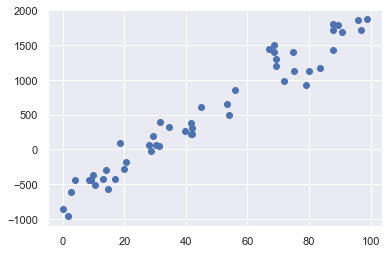

In [20]:
plt.scatter(X, y);

Create and fit the model

Hints:
- np.newaxis

In [21]:
### Your code here

In [22]:
X = X[:,np.newaxis]
print("Shape of x: {}".format(X.shape))
# print(X)

Shape of x: (50, 1)


In [23]:
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=True)
model.fit(X, y)
yfit = model.predict(X)

Show the trained parameters (intercept and slope)

Hints: 
- Trained parameters have a trailing underscore
- Type "model." and then press TAB to have Jupyter show you all available methods and variables

In [24]:
### Your code here

In [25]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [26.54417621]
Model intercept: -721.7154171106408


Show the MSE and R2 for the predicted target values $\hat{y_i}$

Hints: 
- Metrics can be found in the module `sklearn.metrics`. Use TAB to view available metrics.

In [26]:
### Your code here

In [27]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))

MSE : 32733.554281064695
R2 : 0.9525174944395889


Plot the original datapoints and the regression line

In [28]:
### Your code here

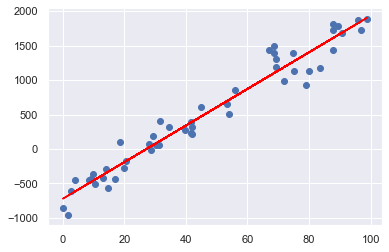

In [29]:
plt.scatter(X, y);
plt.plot(X, yfit, color='red');

Repeat the previous steps with intercept=False

In [30]:
### Your code here

In [31]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)
yfit = model.predict(X)

In [32]:
print("Model slope:    ", model.coef_)
print("Model intercept:", model.intercept_)

Model slope:     [15.71651259]
Model intercept: 0.0


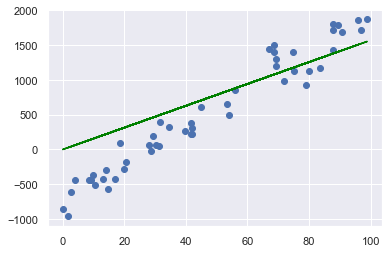

In [33]:
plt.scatter(X, y);
plt.plot(X, yfit, color='green');

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))

MSE : 188688.99981533657
R2 : 0.7262922808201473


What does the intercept do?

In [35]:
# Making the intercept = 0

### Bonus Exercise - Implement your own error metrics

*This (difficult) exercise isn't essential but gives you a better understanding of error metrics*

Given the equations for the MSE and $R^2$ above, implement your own functions to compute them. Error metrics should take two parameters, the observed and predicted target values.

Hints:
- Remember that $R^2$ uses the MSE of the model and of the null model. Use this to simplify the implementation of your $R^2$-function
- The only value predicted by the null model is the mean of the observed target values

In [36]:
### Your code here

# def mse(y_true, y_pred):
#     ...

# def r2(y_true, y_pred):
#     ...

In [41]:
def mse(y_true, y_pred):
    return np.mean((y_true-y_pred)**2)

def r2(y_true, y_pred):
    mse_model = mse(y_true, y_pred)
    mse_null = np.mean((y_true-np.mean(y_true))**2)
    return 1-mse_model/mse_null


Validate your functions by comparing their outputs to those of the `sklearn.metrics` module for the model and data from the previous exercise.

In [38]:
### Your code here

In [45]:
# Custom
print( "MSE :",mse(y, yfit))
print("R2 :", r2(y, yfit))

MSE : 188688.99981533657
R2 : 0.7262922808201473


In [46]:
# Sk-learn
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))

MSE : 188688.99981533657
R2 : 0.7262922808201473


## Multidimensional linear regression
The ``LinearRegression`` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form

$$y=\beta_0+\beta_1x_1+\beta_2x_2+⋯+\beta_nx_n$$

where there are multiple $x$ values. Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyper-plane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize. Nonetheless, the general steps for fitting a model to data outlined for the one-dimensional case above remain the same.

In [47]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
# b0 = 0.5, b1 = 1.5, b2 = -2, b3 = 1
y = 0.5 + 1.5 * X[:, 0] - 2 * X[:, 1] + 1 * X[:, 2] + np.random.randn(100)

model = LinearRegression()
model.fit(X, y)

print("Intercept:    {}".format(model.intercept_))
print("Coefficients: {}".format(model.coef_))

Intercept:    0.35800009070850836
Coefficients: [ 1.48584021 -1.99262111  1.06309845]


Here the $y$ data is constructed from three random $x$ values, and the linear regression recovers the coefficients used to construct the data. In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.

### Exercise - Effects of Advertising on Sales

Imagine that your company wants to increase sales on a certain product. You cannot increase sales directly, but you can adjust advertising.

The advertising dataset in the file `data/advertising.csv` contains information on money spent on advertising via various channels as well as revenue for a product. Each row represents a separate time interval, e.g. a week's worth of sales. For the sake of simplicity we'll ignore confounding factors like seasonality.

The features are:
- TV: advertising dollars spent on TV
- Radio: advertising dollars spent on Radio
- Newspaper: advertising dollars spent on Newspaper

and the response is:
- Sales: sales of a single product in a given market

All numbers are in thousands of dollars, e.g. 14.4 is equivalent to \$14,400.

In [48]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Explore the data and use simple, one-dimensional linear regression models to find answers to the following.
- What is the relation between each ad type and the sales?
- How well do the individual simple linear regression models describe this relation? (Hint: R2 score)

In [ ]:
### Your code here

Model intercept: 7.032593549127693
Model slope:     [0.04753664]
MSE : 10.512652915656757
R2 : 0.611875050850071


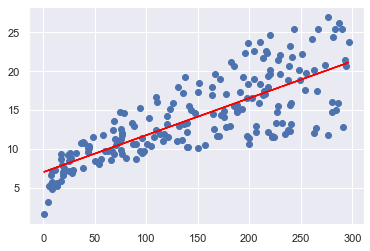

In [87]:
# TV
x= sales.iloc[:,0]
x = x[:,np.newaxis]
y = sales["sales"]
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
yfit = model.predict(x)
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))
plt.scatter(x,y)
plt.plot(x,yfit,color="red")

Model intercept: 12.351407069278162
Model slope:     [0.0546931]
MSE : 25.674022720559698
R2 : 0.05212044544430516


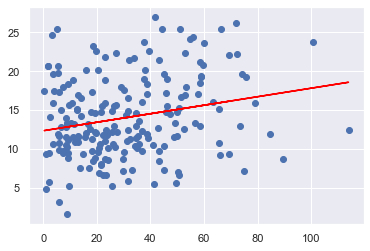

In [89]:
# Newspaper
x= sales.iloc[:,2]
x = x[:,np.newaxis]
y = sales["sales"]
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
yfit = model.predict(x)
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))
plt.scatter(x,y)
plt.plot(x,yfit,color="red")

Model intercept: 9.311638095158283
Model slope:     [0.20249578]
MSE : 18.09239774512544
R2 : 0.33203245544529525


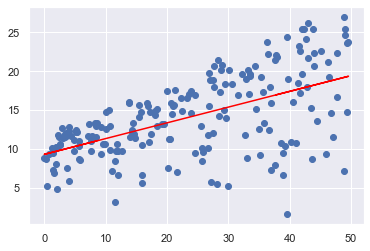

In [88]:
# Radio
x= sales.iloc[:,1]
x = x[:,np.newaxis]
y = sales["sales"]
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)
model.fit(x, y)
yfit = model.predict(x)
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))
plt.scatter(x,y)
plt.plot(x,yfit,color="red")

Model intercept: 7.032593549127693
Model slope:     [0.04753664]
MSE : 10.512652915656757
R2 : 0.611875050850071


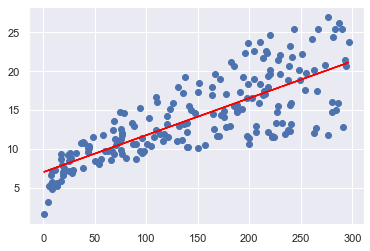

In [93]:
# MC
x_tv= sales['TV']
x_radio = sales['radio']
x_newspaper = sales['newspaper']
y = sales['sales']

x_tv = x_tv[:,np.newaxis]
model = LinearRegression()
model.fit(x_tv, y)
yfit = model.predict(x_tv)
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))
plt.scatter(x_tv,y)
plt.plot(x_tv,yfit,color="red")

# repeat for other col

**Discussion questions:**

- Which ad types have the strongest and weakest influence on sales?
- For each ad type, how much is the expected sales given an additional budget of 10 thousand dollar for that ad type?

In [ ]:
# TV is the best as it have better fit
# newspaper is the weakest influence

# personally think its only the gradient
# additional 10k will increase the sales by .....
# model_slope * (x+10)

# answer:
model_tv.intercept_ + model_tv.coef_ *(10)

Let's see if we can improve the model performance with a multiple linear regression
- Train a multiple linear regression model on all ad types simultaneously. How well does it perform?
- How do the coefficients change versus the simple linear regression?

In [ ]:
### Your code here

In [91]:
# My answer
x= sales.iloc[:,:3]
y = sales["sales"]
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x, y)
yfit = model.predict(x)
print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))

Model intercept: 2.9388893694594085
Model slope:     [ 0.04576465  0.18853002 -0.00103749]
MSE : 2.784126314510936
R2 : 0.8972106381789522


In [104]:
# MC

model = LinearRegression().fit(sales[["TV","radio","newspaper"]],y)
yfit= model.predict(sales[["TV","radio","newspaper"]])

print("Model intercept:", model.intercept_)
print("Model slope:    ", model.coef_)
print( "MSE :",mean_squared_error(y_true=y, y_pred=yfit))
print("R2 :", r2_score(y_true=y, y_pred=yfit))


Model intercept: 2.9388893694594085
Model slope:     [ 0.04576465  0.18853002 -0.00103749]
MSE : 2.784126314510936
R2 : 0.8972106381789522


- What are the expected sales given a new budget of TV=100, Radio=25 and Newspaper=25?

In [105]:
### Your code here

In [106]:
model.intercept_ + sum(model.coef_*[100,25,25])

12.202667011892375

In [108]:
model.predict([[100,25,25]])

array([12.20266701])

## Feature Scaling

<u>For those mochine learning algorithms which are based on the distance of the data points, the range (scale) of the features matter</u>, because it defines the magnitude of the feature and those features in larger scales (e.g. Kilometers vs. Centimeters) will dominate the features in smalle scales. Therefore, as part of the pre-processing step in designing the predictive models, one needs to re-scale the features in the similar ranges.

#### Standardisation:

$$x_{scaled} = \frac{x - \bar{x}}{s}$$

Where $\bar{x} =  mean(x)$, and $s = std(x)$.

Therefore, $mean(x_{scaled}) = 0$ , and $std(x_{scaled}) = 1$. 
In case of presence of outliers for the feature x, this method is not helpful to set the range of $x_{scaled}$. 


#### Min-Max Scaling: 

$$x_{scaled}=\frac{x-x_{min}}{x_{max} - x_{min}} $$

Therefore, $range(x) \subseteq [0 , 1]$


#### Mean Normalization:

$$x_{scaled} = \frac{x - \bar{x}}{x_{max}-x_{min}}$$

Where $\bar{x} =  mean(x)$, and $x_{max} = max(x)$, and $x_{min} = min(x)$.

Therefore, $mean(x_{scaled}) = 0$, and $range(x) \subseteq [-1 , 1]$.


In general, you'll <u>only want to normalize your data if you're going to be using a machine learning or statistics technique that assumes your data is normally distributed</u>. Some examples of these include t-tests, ANOVAs, linear regression, and Gaussian naive Bayes. 


### Feature Scaling in Python:

For each scaling methods "Standardisation" and Min-Max Scaling, we can call the relevant methods from `sklearn.preprocessing`. 


#### Standardisation in Python:

`from sklearn.preprocessing import StandardScaler`

`scaler = StandardScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Min-Max Scaling in Python: 

`from sklearn.preprocessing import MinMaxScaler`

`scaler = MinMaxScaler().fit(x)`

`x_scaled = scaler.transform(x)`


#### Mean Normalization in Python:

`from sklearn.preprocessing import PowerTransformer`

`pt = PowerTransformer(method='box-cox', standardize=False)`

`x_scaled = pt.fit_transform(x)` 

**Example:**

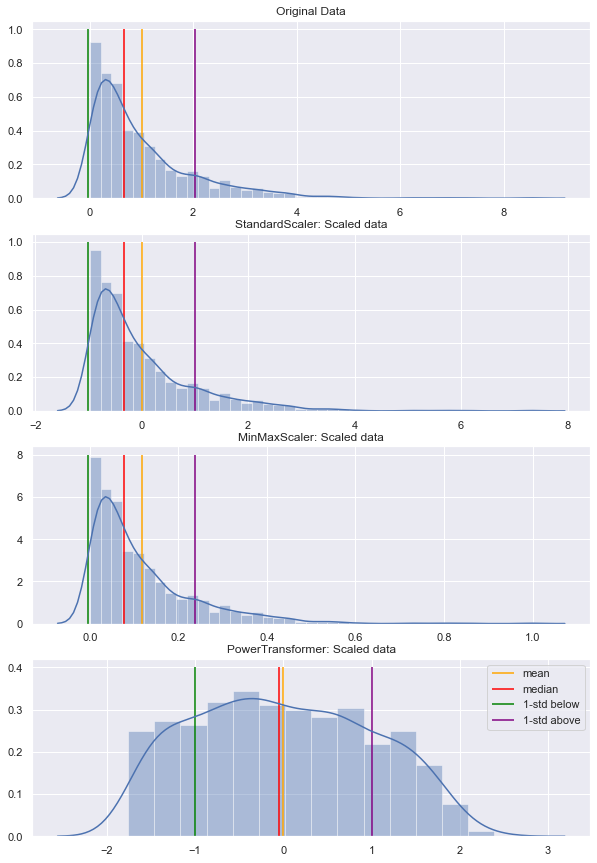

In [109]:
# set seed for reproducibility
np.random.seed(0)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer 

# generate 1000 data points randomly drawn from an exponential distribution
original_data = np.random.exponential(size = 1000)[:,np.newaxis]

# StandardScaler scale the data between 0 and 1
scaler_std = StandardScaler().fit(original_data)
scaled_std = scaler_std.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_Mm = MinMaxScaler().fit(original_data)
scaled_Mm = scaler_Mm.transform(original_data)

# MinMaxScaler scale the data between 0 and 1
scaler_PT = PowerTransformer().fit(original_data)
scaled_PT = scaler_PT.transform(original_data)

# plot both together to compare
fig, ax=plt.subplots(4,1)
fig.set_size_inches(10, 15)

sns.distplot(original_data, ax=ax[0])
ax[0].vlines(np.mean(original_data), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(original_data), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(original_data) - np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(original_data) + np.std(original_data, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("Original Data")


sns.distplot(scaled_std, ax=ax[1])
ax[1].set_title("StandardScaler: Scaled data")
ax[1].vlines(np.mean(scaled_std), ymin = 0, ymax = 1, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_std), ymin = 0, ymax = 1, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_std) - np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'green', label = '1-std below')
ax[1].vlines(np.mean(scaled_std) + np.std(scaled_std, ddof = 1), ymin = 0, ymax = 1, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_Mm, ax=ax[2])
ax[2].set_title("MinMaxScaler: Scaled data")
ax[2].vlines(np.mean(scaled_Mm), ymin = 0, ymax = 8, 
                               color = 'orange', label = 'mean')
ax[2].vlines(np.median(scaled_Mm), ymin = 0, ymax = 8, 
                            color = 'red', label = 'median')
ax[2].vlines(np.mean(scaled_Mm) - np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'green', label = '1-std below')
ax[2].vlines(np.mean(scaled_Mm) + np.std(scaled_Mm, ddof = 1), ymin = 0, ymax = 8, 
                               color = 'purple', label = '1-std above')


sns.distplot(scaled_PT, ax=ax[3])
ax[3].set_title("PowerTransformer: Scaled data")
ax[3].vlines(np.mean(scaled_PT), ymin = 0, ymax = .4, 
                               color = 'orange', label = 'mean')
ax[3].vlines(np.median(scaled_PT), ymin = 0, ymax = .4, 
                            color = 'red', label = 'median')
ax[3].vlines(np.mean(scaled_PT) - np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'green', label = '1-std below')
ax[3].vlines(np.mean(scaled_PT) + np.std(scaled_PT, ddof = 1), ymin = 0, ymax = .4, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

**Example: Impact of scaling on sales dataset**

In [110]:
X = sales[["TV", "radio", "newspaper"]]
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [111]:
scaled_X = PowerTransformer().fit_transform(X)
scaled_X[:4,:]

array([[ 0.94867429,  0.96224689,  1.51433531],
       [-1.19131426,  1.0401788 ,  0.78768252],
       [-1.6477566 ,  1.37070964,  1.51699753],
       [ 0.14102023,  1.14238689,  1.21465643]])

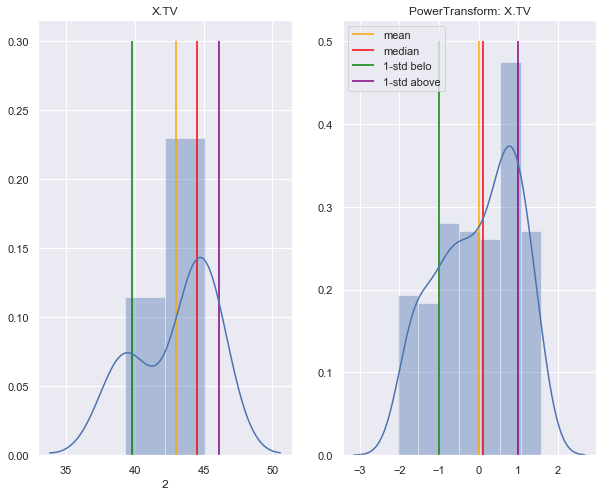

In [112]:
# plot both together to compare
fig, ax=plt.subplots(1,2)
fig.set_size_inches(10, 8)

sns.distplot(X.iloc[1,:], ax=ax[0])
ax[0].vlines(np.mean(X.iloc[1,:]), ymin = 0, ymax = .3, 
                               color = 'orange', label = 'mean')
ax[0].vlines(np.median(X.iloc[1,:]), ymin = 0, ymax = .3, 
                            color = 'red', label = 'median')
ax[0].vlines(np.mean(X.iloc[1,:]) - np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'green', label = '1-std below')
ax[0].vlines(np.mean(X.iloc[1,:]) + np.std(X.iloc[1,:], ddof = 1), ymin = 0, ymax = .3, 
                               color = 'purple', label = '1-std above')
ax[0].set_title("X.TV")


sns.distplot(scaled_X[:,0], ax=ax[1])
ax[1].set_title("PowerTransform: X.TV")
ax[1].vlines(np.mean(scaled_X[:,0]), ymin = 0, ymax = .5, 
                               color = 'orange', label = 'mean')
ax[1].vlines(np.median(scaled_X[:,0]), ymin = 0, ymax = .5, 
                            color = 'red', label = 'median')
ax[1].vlines(np.mean(scaled_X[:,0]) - np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'green', label = '1-std belo')
ax[1].vlines(np.mean(scaled_X[:,0]) + np.std(scaled_X[:,0], ddof = 1), ymin = 0, ymax = .5, 
                               color = 'purple', label = '1-std above')

plt.legend()
plt.show()

In [132]:
model = LinearRegression().fit(X, sales["sales"])

r2score = r2_score(
    sales["sales"], model.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model.predict(X))))


print()
print("TV ad MLR:        {}".format(model.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model.coef_[2]))

R2 of MLR:        0.8981434200729888
MSE of MLR:        2.75886122315442

TV ad MLR:        0.045849616865025145

Radio ad MLR:     0.18745722571658288

Newspaper ad MLR: -0.0009722908491923699


In [133]:
model_scaled = LinearRegression().fit(scaled_X, sales["sales"])

r2score = r2_score(
    sales["sales"], model_scaled.predict(scaled_X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(sales["sales"], model_scaled.predict(scaled_X))))


print()
print("TV ad MLR:        {}".format(model_scaled.coef_[0]))
print()
print("Radio ad MLR:     {}".format(model_scaled.coef_[1]))
print()
print("Newspaper ad MLR: {}".format(model_scaled.coef_[2]))

R2 of MLR:        0.9074639862122942
MSE of MLR:        2.506406757100267

TV ad MLR:        3.970755386314321

Radio ad MLR:     2.7642480807222127

Newspaper ad MLR: 0.06432930163320738


for more info on feature scaling:

https://towardsdatascience.com/all-about-feature-scaling-bcc0ad75cb35
    

## Handling Categorical Predictors with Two Categories

Up to now, all of our predictors have been numeric. What if one of our predictors was categorical?

Let's create a new feature called **Size**, and randomly assign observations to be **small or large**:

In [134]:
sales = pd.read_csv("../data/advertising.csv", index_col=0)
sales.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [135]:
import numpy as np

# set a seed for reproducibility
np.random.seed(42)

# create a Series of booleans in which roughly half are True
nums = np.random.rand(len(sales))
mask_large = nums > 0.5

# initially set Size to small, then change roughly half to be large
sales_size = sales.copy()
sales_size['Size'] = 'small'
sales_size.loc[mask_large, 'Size'] = 'large'
sales_size.head()

,TV,radio,newspaper,sales,Size
1,230.1,37.8,69.2,22.1,small
2,44.5,39.3,45.1,10.4,large
3,17.2,45.9,69.3,9.3,large
4,151.5,41.3,58.5,18.5,large
5,180.8,10.8,58.4,12.9,small


For scikit-learn, we need to represent all data **numerically**. If the feature only has two categories, we can simply create a **dummy variable** that represents the categories as a binary value:

In [136]:
# create a new Series called IsLarge
size_dummies = pd.get_dummies(sales_size.Size, prefix='Size')
size_dummies1 = size_dummies.iloc[:, 1]
size_dummies.head()

,Size_large,Size_small
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [137]:
sales_size1 = pd.concat([sales_size, size_dummies1], axis=1)
sales_size1.head()

,TV,radio,newspaper,sales,Size,Size_small
1,230.1,37.8,69.2,22.1,small,1
2,44.5,39.3,45.1,10.4,large,0
3,17.2,45.9,69.3,9.3,large,0
4,151.5,41.3,58.5,18.5,large,0
5,180.8,10.8,58.4,12.9,small,1


Let's redo the multiple linear regression and include the **Size_small** predictor:

In [138]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_small']
X = sales_size1[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
result = zip(feature_cols, lm.coef_)
resultSet = set(result)
print(resultSet)
print()
r2score = r2_score(
    sales["sales"], lm.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(y, lm.predict(X))))

{('TV', 0.04579983939650755), ('newspaper', -0.0009987157346824371), ('Size_small', 0.04564635201792508), ('radio', 0.18841737406834336)}

R2 of MLR:        0.8972294440532784
MSE of MLR:        2.7836169434179383


How do we interpret the **Size_small coefficient**? For a given amount of TV/Radio/Newspaper ad spending, being a large market is associated with an average **increase** in Sales of 456 (as compared to a Small market, which is called the **baseline level**).

**Exercise:**
What if we had reversed the 0/1 coding and created the feature 'Size_large' instead? 

In [139]:
# Your code here
# gradient will be negative

In [140]:
# create X and y
size_dummies = pd.get_dummies(sales_size.Size, prefix='Size')
size_dummies2 = size_dummies.iloc[:, 0]
sales_size2 = pd.concat([sales_size, size_dummies2], axis=1)

feature_cols = ['TV', 'radio', 'newspaper', 'Size_large']
X = sales_size2[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
result = zip(feature_cols, lm.coef_)
resultSet = set(result)
print(resultSet)
print()
r2score = r2_score(
    sales["sales"], lm.predict(X))
print("R2 of MLR:        {}".format(r2score))
print("MSE of MLR:        {}".format(mean_squared_error(y, lm.predict(X))))

{('TV', 0.04579983939650755), ('newspaper', -0.0009987157346824371), ('Size_large', -0.04564635201792508), ('radio', 0.18841737406834336)}

R2 of MLR:        0.8972294440532784
MSE of MLR:        2.7836169434179383


## Handling Categorical Predictors with More than Two Categories

Let's create a new feature called **Area**, and randomly assign observations to be **rural, suburban, or urban**:

In [141]:
# set a seed for reproducibility
np.random.seed(123456)

# assign roughly one third of observations to each group
nums = np.random.rand(len(sales))
mask_suburban = (nums > 0.33) & (nums < 0.66)
mask_urban = nums > 0.66
sales_Area = sales_size2.copy()
sales_Area['Area'] = 'rural'
sales_Area.loc[mask_suburban, 'Area'] = 'suburban'
sales_Area.loc[mask_urban, 'Area'] = 'urban'
sales_Area.head()

,TV,radio,newspaper,sales,Size,Size_large,Area
1,230.1,37.8,69.2,22.1,small,0,rural
2,44.5,39.3,45.1,10.4,large,1,urban
3,17.2,45.9,69.3,9.3,large,1,rural
4,151.5,41.3,58.5,18.5,large,1,urban
5,180.8,10.8,58.4,12.9,small,0,suburban


We have to represent Area numerically, but we can't simply code it as 0=rural, 1=suburban, 2=urban because that would imply an **ordered relationship** between suburban and urban (and thus urban is somehow "twice" the suburban category).

Instead, we create **another dummy variable**:

In [142]:
# create three dummy variables using get_dummies, then exclude the first dummy column
area_dummies = pd.get_dummies(sales_Area.Area, prefix='Area').iloc[:, 1:]

# concatenate the dummy variable columns onto the original DataFrame (axis=0 means rows, axis=1 means columns)
sales_Area = pd.concat([sales_Area, area_dummies], axis=1)
sales_Area.head()

,TV,radio,newspaper,sales,Size,Size_large,Area,Area_suburban,Area_urban
1,230.1,37.8,69.2,22.1,small,0,rural,0,0
2,44.5,39.3,45.1,10.4,large,1,urban,0,1
3,17.2,45.9,69.3,9.3,large,1,rural,0,0
4,151.5,41.3,58.5,18.5,large,1,urban,0,1
5,180.8,10.8,58.4,12.9,small,0,suburban,1,0


Here is how we interpret the coding:
- **rural** is coded as Area_suburban=0 and Area_urban=0
- **suburban** is coded as Area_suburban=1 and Area_urban=0
- **urban** is coded as Area_suburban=0 and Area_urban=1

Why do we only need **two dummy variables, not three?** Because two dummies captures all of the information about the Area feature, and implicitly defines rural as the baseline level. (In general, if you have a categorical feature with k levels, you create k-1 dummy variables.)

If this is confusing, think about why we only needed one dummy variable for Size (IsLarge), not two dummy variables (IsSmall and IsLarge).

Let's include the two new dummy variables in the model:

In [131]:
# create X and y
feature_cols = ['TV', 'radio', 'newspaper', 'Size_large', 'Area_suburban', 'Area_urban']
X = sales_Area[feature_cols]
y = sales.sales

# instantiate, fit
lm = LinearRegression()
lm.fit(X, y)

# print coefficients
Results=zip(feature_cols, lm.coef_)
SetResults = set(Results)
print(SetResults)

{('TV', 0.045849616865025145), ('newspaper', -0.0009722908491923699), ('Size_large', -0.06222071661049783), ('Area_suburban', -0.12728485387467384), ('radio', 0.18745722571658288), ('Area_urban', 0.2489374268240426)}


How do we interpret the coefficients?
- Holding all other variables fixed, being a **suburban** area is associated with an average **decrease** in Sales of 127.28 (as compared to the baseline level, which is rural).
- Being an **urban** area is associated with an average **increase** in Sales of 248.93 (as compared to rural).

**A final note about dummy encoding:** If you have categories that can be ranked (i.e., strongly disagree, disagree, neutral, agree, strongly agree), you can potentially use a single dummy variable and represent the categories numerically (such as 1, 2, 3, 4, 5).

## Using Linear Regression for non-linear relations

Consider the following case.

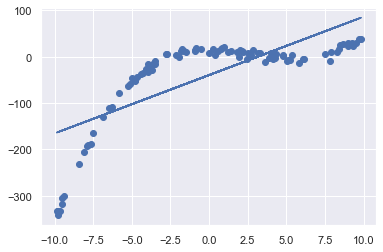

In [143]:
X = (10 * (2 * np.random.rand(100) - 1))[:, np.newaxis]
# b0 = 15, b1 = 0, b2 = -1.7, b3 = 0.2
y = 15 - 1.7 * X**2 + 0.2 * X**3 + np.random.normal(scale=5, size=X.shape)

model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

plt.scatter(X, y)
plt.plot(X, y_pred);

No matter how hard we try, we'll never be able to fit a line to capture the non-linear relationship between the features and the target value.

### Basis functions

A trick to adapt linear regression to nonlinear relationships between features and targets is to transform the data and generate new features from the existing ones using basis functions. A very common set of basis functions are **polynomial basis functions** $f_n(x) = x^n$, which transform a simple linear regression from

$$ y = \beta_0 + \beta_1 x $$

into

$$ y = \beta_0 + \beta_1 x + \beta_2 x^2 + \beta_3 x^3 + \ldots + \beta_n x^n$$

We are free to choose how many polynomials to include. In fact, the basis functions $f(x)$ can be practically anything; we are free to transform features however we deem necessary.

This can, of course, also be extended to multiple linear regression so that, e.g.

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

could become

$$ y = \beta_0 + \beta_{1a} x_1 + \beta_{1b} x_1^2 + \beta_{2a} x_2 + \beta_{2b} x_2^2$$
 
Note that this is still a linear model. Linearity in the context of modelling means that the coefficients $\beta_i$ are only ever added to (or subtracted from) each other. The basis functions $f(x)$ may very well be non-linear, though. For example,

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 $$

is a linear model, despite the $x_1 x_2$ term, whereas

$$ y = \beta_0 + \frac{\beta_1 x}{\beta_2 + x}$$

is a non-linear model, despite only having one feature, because the coefficients are divided by each other.

**All we are doing is engineering new features to capture nonlinear patterns!**

### Regression with polynomial basis functions

The polynomial basis functions are so common and useful that this transformation is built into Scikit-Learn.

In [144]:
x_1d = np.array([2, 3, 4])[:, np.newaxis]
x_1d

array([[2],
       [3],
       [4]])

In [145]:
from sklearn.preprocessing import PolynomialFeatures

In [146]:
poly = PolynomialFeatures(degree=4, include_bias=False)
poly.fit(x_1d)
x_poly = poly.fit_transform(x_1d)
x_poly

array([[  2.,   4.,   8.,  16.],
       [  3.,   9.,  27.,  81.],
       [  4.,  16.,  64., 256.]])

We see here that the transformer has added columns to our array corresponding to $x^n$.

`include_bias` adds an $x^0 = 1$ column as well. This can be useful for more advanced models but in the case of a linear regression, this has the same effect as adding an intercept term during the fit itself.

In [147]:
poly = PolynomialFeatures(degree=4, include_bias=True)
poly.fit(x_1d)
x_poly = poly.transform(x_1d)
x_poly

array([[  1.,   2.,   4.,   8.,  16.],
       [  1.,   3.,   9.,  27.,  81.],
       [  1.,   4.,  16.,  64., 256.]])

The `fit()` and `transform()` syntax may seem cumbersome but plays into Scikit-Learn's strength as a flexible framework. All of the preprocessors/transformers that are part of the [Pipeline API](https://scikit-learn.org/stable/modules/compose.html#pipeline) as well as the actual machine learning models implement these two functions. That means we can use [pipelines](http://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) to chain together many different steps into a single object. This ensures that our code stays concise and becomes reusable. A pipeline will apply the `fit()` and `transform()` functions of each individual step and pass along the resulting data to the next step.

For example, we can construct a pipeline that applies a polynomial transformation to the $3^{rd}$ degree, scales the resulting features to lie between 0 and 1, and then trains a linear regression on the resulting features.

In [148]:
from sklearn.pipeline import make_pipeline

In [149]:
from sklearn.preprocessing import MinMaxScaler

In [162]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    MinMaxScaler(), 
    LinearRegression())
poly_pipeline

Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=3, include_bias=False,
                                    interaction_only=False, order='C')),
                ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
                ('linearregression',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [163]:
poly_pipeline.steps

[('polynomialfeatures',
  PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                     order='C')),
 ('minmaxscaler', MinMaxScaler(copy=True, feature_range=(0, 1))),
 ('linearregression',
  LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False))]

We can use the pipeline as a single object to fit the non-linear relationship from above.

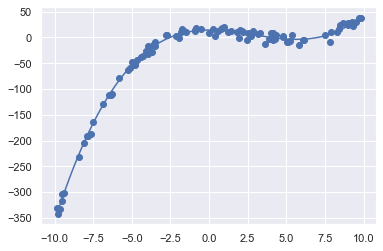

In [165]:
poly_pipeline.fit(X, y)
X_pred = np.linspace(X.min(), X.max(), 100)[:, np.newaxis]
y_pred = poly_pipeline.predict(X_pred)
plt.scatter(X, y)
plt.plot(X_pred, y_pred);

Our polynomial expansion accurately captures the non-linear relationship!

### A comment on `PolynomialFeatures`
The `PolynomialFeatures` preprocessor doesn't just apply exponents to features but also looks at interaction terms $x_i^n x_j^m$. For example, applying `PolynomialFeatures(degree=2)` to the following linear model:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 $$

will result in:

$$ y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1^2 + \beta_4 x_2^2 + \beta_5 x_1 x_2$$

`PolynomialFeatures` will generate all interaction terms where the sum of the exponents is less than or equal to `degree`. So applying `PolynomialFeatures(degree=3)` to the linear model above results in:

$$ 
\begin{aligned}
y = \beta_0 &+ \beta_1 x_1 + \beta_2 x_2\\
            &+ \beta_3 x_1^2 + \beta_4 x_2^2\\
            &+ \beta_5 x_1 x_2\\
            &+ \beta_6 x_1^3 + \beta_7 x_2^3\\
            &+ \beta_7 x_1^2 x_2 + \beta_8 x_2^2 x_1\\
\end{aligned}
$$

Keep this in mind when generating polynomial expansions: the number of resulting features can become computationally problematic if `degree` is too large. For example, if we start with 10 features, a polynomial expansion with `degree=4` will result in 1000 features:

In [166]:
x_1d = np.random.randint(low=-5, high=5, size=(5, 10))
x_poly = PolynomialFeatures(degree=4).fit_transform(x_1d)
print("Original shape:    {}".format(x_1d.shape))
print("Transformed shape: {}".format(x_poly.shape))

# set interaction_only = True only creates x_i * x_j for i != j
x_poly_inter = PolynomialFeatures(degree=4, interaction_only = True).fit_transform(x_1d)
print("Interaction Only Transformed shape: {}".format(x_poly_inter.shape))

Original shape:    (5, 10)
Transformed shape: (5, 1001)
Interaction Only Transformed shape: (5, 386)


## Best Practice for Machine Learning
In the previous examples and exercises, we have assessed the performance of the trained model on the data it was trained on. This is problematic, as we have no guarantee that the model will capture the true relationship between the features and target values. Consider the following example:

<center><img src="../images/overfitting.png" /></center>

The black dots represent the raw input data and the two lines represent two models trained on this data.

- The blue line perfectly predicts the target value for each data point. This model has a perfect performance, i.e. $R^2 = 1$, when assessed on the training data. However, it clearly does not capture the true relationship between the feature and the target value.
- The black line, although not a perfect fit, i.e. $R^2 < 1$, much more accurately describes the true relationship between feature and target.

To avoid this phenomenon, called **overfitting**, we can split our data into a training and a test data set. This allows us to train the model on one part of the data and then assess its performance on data it has never seen to determine how well it generalizes to new data.

We can use the `sklearn.model_selection.train_test_split` function to divide the data into 2 sets for us. 

In [167]:
from sklearn.model_selection import train_test_split

# Generate random data
rng = np.random.RandomState(42)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.]) + np.random.randn(100)

In [168]:
print("X.shape", X.shape)
print("y.shape", y.shape)

X.shape (100, 3)
y.shape (100,)


Now we divide the data into train and test.

In [173]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("X_train.shape", X_train.shape)
print("y_train.shape", y_train.shape)
print("X_test.shape", X_test.shape)
print("y_test.shape", y_test.shape)

X_train.shape (75, 3)
y_train.shape (75,)
X_test.shape (25, 3)
y_test.shape (25,)


We now have a dataset of 75 entries that we can train the model on and a test dataset of 25 entries that we can use to assess the performance of the model.

In [175]:
model = LinearRegression().fit(X_train, y_train)
print("Intercept: {}".format(model.intercept_))
print("Slope:     {}".format(model.coef_))

Intercept: 0.30113718069758755
Slope:     [ 1.57239721 -1.99777068  0.98472875]


In [176]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

Train R2 Score: 0.9843616297594978
Test R2 Score:  0.9769269989685369


The performance on the training data will typically be better than the test score. In general, we want to make sure that training and test performance are similar and maximal. We will go into more detail about tuning models, overfitting, and assessing their performance at a later point in this course. For now, keep in mind that we should separate our data into a training and a test set.

There is no ironclad rule about how large these two subsets of our data should be. In general, more training data will result in a model that better captures the true relationship between features and target.

### Exercise - Train and test the advertising dataset

Train a multiple linear regression on the advertising dataset as above, but this time reserve a fraction of the data as a test set to assess the performance. Do this with the following splits:
- Training: 50%, Test: 50%
- Training 95%, Test: 5%
- Training 5%, Test: 95%

Hint: The `test_size` argument of `train_test_split` takes a number between 0 and 1 indicating the relative size of the test set, e.g. 0.3 corresponds to "Reserve 30% of the data as a test set"

In [ ]:
X = sales[["TV", "radio", "newspaper"]]
y = sales["sales"]

### Your code here

We can use the following rules of thumb regarding the train and test performances:
- If $R^2_{train} \approx R^2_{test}$ and the performance is good, then our model is optimally trained.
- If $R^2_{train} \approx R^2_{test}$ but the performance is poor
    - We need more training data or
    - The algorithm doesn't accurately capture the relationship between features and target value, e.g. trying to perform a linear regression on non-linear data.
- If $R^2_{train} \gg R^2_{test}$ then the model is most likely overfitting on the data. We will talk about solutions to this problem soon.
- If $R^2_{train} \ll R^2_{test}$ then we most likely do not have sufficient test data to correctly assess the performance. More robust performance assessments, like **cross-validation** will solve this problem for us.

## Explore sklearns datasets

Sklearn provides both toy as well as real-world datasets: https://scikit-learn.org/stable/datasets/index.html.

We can load these with the built-in `sklearn.datasets.load_*()` or `sklearn.datasets.fetch_*()` functions. Python will download these datasets if they are not already saved locally.

In [177]:
diabetes = sklearn.datasets.load_diabetes()

The resulting object is a dictionary with various entries, such as the data description, the features, feature names, etc.

In [178]:
diabetes.keys()

dict_keys(['data', 'target', 'DESCR', 'feature_names', 'data_filename', 'target_filename'])

In [179]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

In [180]:
diabetes.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

**Exercise - Boston Housing Data**

We're going to predict housing prices

1. Load the sklearn dataset of the Boston house prices. 
2. Use a multiple linear regression to predict housing prices
    - Divide the data into a training and test data set (70% training/30% test split)
    - Train a multiple linear regression model
    - Assess the performance of the model using the $R^2$ score
    - Play around with the train/test split size to see how the fit changes

In [ ]:
### Your code here

In [181]:
boston = sklearn.datasets.load_boston()
print("Keys in Boston dataset: {}".format(boston.keys()))
print(boston.DESCR)

Keys in Boston dataset: dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radia

In [ ]:
### Your code here

In [189]:
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
print("X_train.shape", X_train.shape)
print("X_test.shape", X_test.shape)
print("y_train.shape", y_train.shape)
print("y_test.shape", y_test.shape)

X_train.shape (354, 13)
X_test.shape (152, 13)
y_train.shape (354,)
y_test.shape (152,)


In [193]:
model = LinearRegression().fit(X_train, y_train)
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)
print("Train R2 Score: {}".format(r2_train))
print("Test R2 Score:  {}".format(r2_test))

print("Train R2 Score: {}".format(model.score(X_train,y_train)))
print("Test R2 Score: {}".format(model.score(X_test,y_test)))

Train R2 Score: 0.7241984864381144
Test R2 Score:  0.7595760950332706
Train R2 Score: 0.7241984864381144
Test R2 Score: 0.7595760950332706


3. Try to improve the regression by using polynomial features
    - Create an sklearn pipeline that generates polynomial features and then trains a multiple linear regression on these features
    - Assess the performance ($R^2$ score) of this polynomial regression on the training and test data
    - Do this for polynomial degrees 2, 3, and 4.
    - Compare your results with the multiple linear regression above. What are your observations?

In [ ]:
### Your code here

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=3, include_bias=False), 
    LinearRegression())
poly_pipeline.fit(X_train,y_train)



# Lasso, Ridge, and Elastic Net Regression: Regularization

Welcome to Regularization!

With the higher degree polynomials we have seen a situation were there are a lot of features and the model tends to overfit. 

Regularization is putting a penalty on the size of the coefficients to prevent overfitting.

In this Notebook we will go into Ridge and Lasso Regression, how they prevent overfitting and how they can deal with a large number of features.

## Lasso, Ridge, and Elastic Net

**Overview**
Ridge and Lasso regression are powerful techniques generally used for creating parsimonious models in presence of a ‘large’ number of features. Here ‘large’ can typically mean either of two things:

- Large enough to enhance the tendency of a model to overfit (as low as 10 variables might cause overfitting)
- Large enough to cause computational challenges. With modern systems, this situation might arise in case of millions or billions of features

Though Ridge and Lasso might appear to work towards a common goal, the inherent properties and practical use cases differ substantially. Generally, they work by penalizing the magnitude of coefficients of features along with minimizing the error between predicted and actual observations. These are called ‘regularization’ techniques. Regularization reduces the model complexity and prevents over-fitting. The key difference is in how they assign penalty to the coefficients:

**Regression:**

$$\hat{y} = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n $$

- Minimize Error: $$\sum_{i=1}^{m} {(y - \hat{y})^2} = \sum_{i=1}^{m} {(y -  \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n )^2}$$

**Lasso Regression:**

**LASSO** stands for ``Least Absolute Shrinkage and Selection Operator`` where emphasis on the 2 key words – ‘absolute‘ and ‘selection‘.

Lasso regression performs **L1 regularization**, i.e. it adds a factor of sum of absolute value of coefficients in the optimization objective. 

$$\hat{y} = \beta_0 + \beta_1 \times x_1 + \beta_2 \times x_2 + ... + \beta_n \times x_n + \alpha\sum_{i=1}^{n} {|\beta_i|}$$

Thus, lasso regression optimizes the following:

**Objective = RSS + α * (sum of absolute value of coefficients)**

Here, α (alpha) works similar to that of ridge and provides a trade-off between balancing RSS and magnitude of coefficients. Like that of ridge, α can take various values. Lets iterate it here briefly:

1. α = 0: Same coefficients as simple linear regression
2. α = ∞: All coefficients zero (same logic as before)
3. 0 < α < ∞: coefficients between 0 and that of simple linear regression

**Ridge Regression:**


As mentioned before, ``ridge regression`` performs ‘L2 regularization‘, i.e. it adds a factor of sum of squares of coefficients in the optimization objective.

$$\sum_{i=1}^{m} {(y - \hat{y})^2} = \sum_{i=1}^{m} {(y -  \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n )^2} + \alpha \sum_{i=1}^{n} {\beta_i^2}$$

Thus, ridge regression optimizes the following:

**Objective = RSS + α * (sum of square of coefficients)**

Here, α (alpha) is the parameter which balances the amount of emphasis given to minimizing RSS vs minimizing sum of square of coefficients. α can take various values:

1. α = 0:
    - The objective becomes same as simple linear regression.
    - We’ll get the same coefficients as simple linear regression.
2. α = ∞:
    - The coefficients will be zero. Why? Because of infinite weightage on square of coefficients, anything less than zero will make the objective infinite.
3. 0 < α < ∞:
    - The magnitude of α will decide the weightage given to different parts of objective.
    - The coefficients will be somewhere between 0 and ones for simple linear regression.

**Elastic Net Regression:**

$$\hat{y} = \beta_0 + \beta_1  x_1 + \beta_2  x_2 + ... + \beta_n  x_n + \lambda_1 \sum_{i=1}^{n} {\beta_i^2} + \lambda_2 \sum_{i=1}^{n} {|\beta_i|}$$


In `sklearn`, the relationship between $\lambda_1$ and $\lambda_2$ is defined by two parameters in `ElasticNet` function `alpha` and `l1_ratio` where:
$$\alpha = \lambda_1 + \lambda_2$$
and $$ l1-ratio = \frac {\lambda_1}{(\lambda_1 + \lambda_2)}$$

For example, if $\alpha = 1$, and l1_ratio = 0.3, then:
$$ {\lambda_1 + \lambda_2 = 1} \\ { \frac {\lambda_1}{(\lambda_1 + \lambda_2)} = 0.3}$$
Therefore: 
$$ {\lambda_1 = 0.3} \\  {\lambda_2 = 0.7}$$

 **Example - Lasso on Boston with Polynomials**

- Load again the boston dataset from sklearn.
- Divide the data into 30% test and 70% train set.
- Fit a Polynomial Lasso Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialLasso to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha=1, max_iter=100000

In [194]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Lasso

def PolynomialLasso(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         Lasso(**kwargs))

In [195]:
from sklearn.datasets import load_boston

boston = load_boston()
X = boston.data
y = boston.target

In [196]:
X.shape

(506, 13)

In [197]:
y.shape

(506,)

In [198]:
from sklearn.model_selection import train_test_split

X1, X2, y1, y2 = train_test_split(X, y,random_state=0,test_size=0.3)

In [199]:
Lasso_Poly2_boston = PolynomialLasso(2, alpha = 0.1, max_iter=1e5)
Lasso_Poly2_boston.fit(X1, y1)

D:\Users\Faiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 6.977845579731593, tolerance: 3.000663776836158
  positive)


Pipeline(memory=None,
         steps=[('polynomialfeatures',
                 PolynomialFeatures(degree=2, include_bias=True,
                                    interaction_only=False, order='C')),
                ('lasso',
                 Lasso(alpha=0.1, copy_X=True, fit_intercept=True,
                       max_iter=100000.0, normalize=False, positive=False,
                       precompute=False, random_state=None, selection='cyclic',
                       tol=0.0001, warm_start=False))],
         verbose=False)

In [200]:
print("Train score", Lasso_Poly2_boston.score(X1, y1))
print("Test score", Lasso_Poly2_boston.score(X2,y2))
k = Lasso_Poly2_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Lasso_Poly2_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Lasso_Poly2_boston.steps[1][1].coef_ == 0))

Train score 0.9297312766723181
Test score 0.7888603380984699
Features all 105
Features used 69
Features NOT used 36


In [201]:
Lasso_Poly3_boston = PolynomialLasso(3, alpha = 1, max_iter=1e5)
Lasso_Poly3_boston.fit(X1, y1)

print("Train score", Lasso_Poly3_boston.score(X1, y1))
print("Test score", Lasso_Poly3_boston.score(X2,y2))
k = Lasso_Poly3_boston.steps[1][1].coef_
print("Features all", len(k))
print("Features used", sum(Lasso_Poly3_boston.steps[1][1].coef_ != 0))
print("Features NOT used", sum(Lasso_Poly3_boston.steps[1][1].coef_ == 0))

Train score 0.9831517865052826
Test score 0.13719252065156684
Features all 560
Features used 238
Features NOT used 322


D:\Users\Faiz\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 358.06123523631175, tolerance: 3.000663776836158
  positive)


**Exercise: Ridge & ElasticNet on Boston with Polynomials**
- Fit a Polynomial Ridge Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialLasso to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha=1, max_iter=100000
    
- Fit a Polynomial Elastic Net Regression on the train data
    - Use degree=2, alpha=0.1, max_iter=100000
- What is the R2 for train and test? How many features were selected?
- Now try:
    - change PolynomialLasso to set interaction_only=True in PolynomialFeatures
    - degree=3, alpha = 1, l1_ratio=0.5, max_iter=100000

## Resources

- To go much more in-depth on linear regression, read Chapter 3 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/), from which this lesson was adapted. Alternatively, watch the [related videos](http://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) or read my [quick reference guide](http://www.dataschool.io/applying-and-interpreting-linear-regression/) to the key points in that chapter.
- To learn more about Statsmodels and how to interpret the output, DataRobot has some decent posts on [simple linear regression](http://www.datarobot.com/blog/ordinary-least-squares-in-python/) and [multiple linear regression](http://www.datarobot.com/blog/multiple-regression-using-statsmodels/).
- This [introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm) is much more detailed and mathematically thorough, and includes lots of good advice.
- This is a relatively quick post on the [assumptions of linear regression](http://pareonline.net/getvn.asp?n=2&v=8).
- Feature Selection: (https://www.datacamp.com/community/tutorials/feature-selection-python)
- Feature Engineering: (https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b)
- Handling Highly Correlated Features: (https://blog.datadive.net/selecting-good-features-part-ii-linear-models-and-regularization/)